In [1]:
#Importing all the necessary libraries
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
# Define your column names as a list
column_names = ['Date', 'Time', 'Code', 'Value']

In [3]:
#loading all 70 data to one dataframe
df = "df"
data = "data-0"
data2 = "data-"
final_df = pd.DataFrame([])
for i in range(1,9):
    df = pd.read_csv('pathtofolder'+ data + str(i) +'.csv', delimiter='\t', header=None, names=column_names)
    df = df.dropna()
    final_df = pd.concat([final_df, df], axis=0, ignore_index=True)
    #final_df = pd.merge(final_df, df,on='Date', how='outer', suffixes=('_df1', '_df2'))

# for i in range(10,11):
#     df = pd.read_csv('pathtofolder'+ data2 + str(i) + '.csv', delimiter='\t', header=None, names=column_names)
#     final_df = pd.concat([final_df, df], axis=0, ignore_index=True)
#     #final_df = pd.merge(final_df, df,on='Date', how='outer', suffixes=('_df1', '_df2'))

In [4]:
final_df.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [5]:
final_df = final_df.drop(columns=['Date', 'Time'])

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    3172 non-null   int64 
 1   Value   3172 non-null   object
dtypes: int64(1), object(1)
memory usage: 49.7+ KB


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3165 entries, 0 to 3171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Code    3165 non-null   int32
 1   Value   3165 non-null   int32
dtypes: int32(2)
memory usage: 49.5 KB


In [9]:
df_cleaned["Value"].unique()
df_cleaned["Value"].nunique()

326

In [10]:
df_cleaned["Value"].max()

431

In [11]:
df_cleaned["Value"].min()

0

In [12]:
#df_cleaned = df_cleaned["Value"]
num_bins = 5 # for example, dividing data into 10 categories
df_cleaned["Value"] = pd.qcut(df_cleaned["Value"], q=num_bins, labels=False, duplicates='drop')

In [13]:
df_cleaned

,Code,Value
0,58,3
1,33,1
2,34,2
3,62,3
4,33,1
...,...,...
3167,57,3
3168,57,3
3169,61,4
3170,62,3


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3165 entries, 0 to 3171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Code    3165 non-null   int32
 1   Value   3165 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 61.8 KB


In [15]:
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=["Code", ]).astype(int)

In [16]:
df_cleaned_encoded

,Value,Code_33,Code_34,Code_35,Code_48,Code_56,Code_57,Code_58,Code_59,Code_60,Code_61,Code_62,Code_63,Code_64,Code_65,Code_67,Code_68,Code_69,Code_72
0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3168,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3169,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3170,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
y = df_cleaned_encoded['Value']# Target (the 'Value' column)

#df_cleaned_encoded['Vector'] = df_cleaned_encoded.drop('Value', axis=1).apply(lambda row: np.array(row), axis=1)

#X = df_cleaned_encoded.drop('Value', axis=1) # Features (only the 'Code' column)
#X=df_cleaned_encoded['Vector']
X=df_cleaned_encoded.drop('Value', axis=1)

In [18]:
y.info()

<class 'pandas.core.series.Series'>
Index: 3165 entries, 0 to 3171
Series name: Value
Non-Null Count  Dtype
--------------  -----
3165 non-null   int32
dtypes: int32(1)
memory usage: 37.1 KB


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3165 entries, 0 to 3171
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Code_33  3165 non-null   int32
 1   Code_34  3165 non-null   int32
 2   Code_35  3165 non-null   int32
 3   Code_48  3165 non-null   int32
 4   Code_56  3165 non-null   int32
 5   Code_57  3165 non-null   int32
 6   Code_58  3165 non-null   int32
 7   Code_59  3165 non-null   int32
 8   Code_60  3165 non-null   int32
 9   Code_61  3165 non-null   int32
 10  Code_62  3165 non-null   int32
 11  Code_63  3165 non-null   int32
 12  Code_64  3165 non-null   int32
 13  Code_65  3165 non-null   int32
 14  Code_67  3165 non-null   int32
 15  Code_68  3165 non-null   int32
 16  Code_69  3165 non-null   int32
 17  Code_72  3165 non-null   int32
dtypes: int32(18)
memory usage: 247.3 KB


In [20]:
#Splitting the data into training, validation, and test sets (60-10-30% split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.3, shuffle=True) 

# Output the sizes of each dataset
sizes = {
    "Training Set": X_train.shape,
    "Validation Set": X_val.shape,
    "Test Set": X_test.shape
}
sizes

{'Training Set': (1899, 18),
 'Validation Set': (316, 18),
 'Test Set': (950, 18)}

In [21]:
#KNN IMPLEMENTATION

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X.to_numpy()]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train.to_numpy()]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Initialize KNN with k=3 (for example)
knn = KNN(k=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

In [22]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')

In [23]:
print(f"Accuracy: {accuracy}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")
print(f"F1 Score (Weighted): {f1_weighted}")
print(f"F1 Score (Macro): {f1_macro}")

Accuracy: 0.4768421052631579
Precision (Weighted): 0.5890655021051133
Recall (Weighted): 0.4768421052631579
F1 Score (Weighted): 0.441440325580437
F1 Score (Macro): 0.4398843926009691


In [24]:
#Five iterations with different values of k:

accuracy_arr = []
precision_arr = []
recall_arr = []
f1_weighted_arr = []
f1_macro_arr = []


for i in range(2,7):
    # Initialize KNN with k=3 (for example)
    knn = KNN(k=i)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_arr.append(accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_arr.append(precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    recall_arr.append(recall)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_weighted_arr.append(f1_weighted)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_macro_arr.append(f1_macro)
    
    print(f"-------------where K=: {i}")
    print(f"Accuracy for k = {i}: {accuracy}")
    print(f"Precision (Weighted) for k = {i}: {precision}")
    print(f"Recall (Weighted) for k = {i}: {recall}")
    print(f"F1 Score (Weighted) for k = {i}: {f1_weighted}")
    print(f"F1 Score (Macro) for k = {i}: {f1_macro}")

-------------where K=: 2
Accuracy for k = 2: 0.48105263157894734
Precision (Weighted) for k = 2: 0.5837711434302131
Recall (Weighted) for k = 2: 0.48105263157894734
F1 Score (Weighted) for k = 2: 0.447353659660487
F1 Score (Macro) for k = 2: 0.44278009732433776
-------------where K=: 3
Accuracy for k = 3: 0.4768421052631579
Precision (Weighted) for k = 3: 0.5890655021051133
Recall (Weighted) for k = 3: 0.4768421052631579
F1 Score (Weighted) for k = 3: 0.441440325580437
F1 Score (Macro) for k = 3: 0.4398843926009691
-------------where K=: 4
Accuracy for k = 4: 0.4768421052631579
Precision (Weighted) for k = 4: 0.5890655021051133
Recall (Weighted) for k = 4: 0.4768421052631579
F1 Score (Weighted) for k = 4: 0.441440325580437
F1 Score (Macro) for k = 4: 0.4398843926009691
-------------where K=: 5
Accuracy for k = 5: 0.4768421052631579
Precision (Weighted) for k = 5: 0.5890655021051133
Recall (Weighted) for k = 5: 0.4768421052631579
F1 Score (Weighted) for k = 5: 0.441440325580437
F1 Score

In [25]:
#plot the graphs:

[0.48105263157894734, 0.4768421052631579, 0.4768421052631579, 0.4768421052631579, 0.4789473684210526]


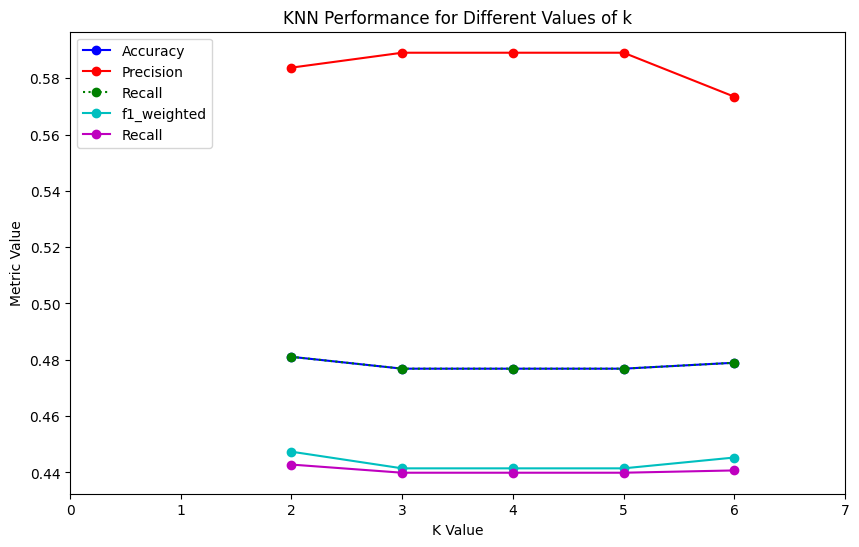

In [26]:
#for accuracy
plt.figure(figsize=(10, 6))
print(accuracy_arr)
plt.plot(range(2, 7), accuracy_arr, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(range(2, 7), precision_arr, marker='o', linestyle='-', color='r', label='Precision')
plt.plot(range(2, 7), recall_arr, marker='o', linestyle='dotted', color='g', label='Recall')
plt.plot(range(2, 7), f1_weighted_arr, marker='o', linestyle='-', color='c', label='f1_weighted')
plt.plot(range(2, 7), f1_macro_arr, marker='o', linestyle='-', color='m', label='Recall')
#plt.figure(figsize=(10, 6))
# plt.plot(range(1, 6), accuracy, label='Accuracy')
# plt.plot(range(1, 6), precision_arr, label='Precision (Weighted)')
# plt.plot(range(1, 6), recall_arr, label='Recall (Weighted)')
# plt.plot(range(1, 6), f1_weighted_arr, label='F1 Score (Weighted)')
# plt.plot(range(1, 6), f1_macro_arr, label='F1 Score (Macro)')

plt.title('KNN Performance for Different Values of k')
plt.xlabel('K Value')
plt.ylabel('Metric Value')
plt.xticks(range(0, 8))
#plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# class KMeans:
#     def __init__(self, k=3, max_iters=100):
#         self.k = k
#         self.max_iters = max_iters
#         self.centroids = []

#     def fit(self, X):
#         # Randomly initialize centroids
#         self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

#         for _ in range(self.max_iters):
#             # Assign clusters
#             clusters = self._get_clusters(X)

#             # Calculate new centroids
#             new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(self.k)])

#             # Check for convergence (if centroids don't change)
#             if np.all(new_centroids == self.centroids):
#                 break

#             self.centroids = new_centroids

#     def _get_clusters(self, X):
#         # Compute distances from each point to each centroid
#         distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
#         return np.argmin(distances, axis=0)

#     def predict(self, X):
#         return self._get_clusters(X)

# # Convert the training set to a numpy array and reshape for clustering
# X_train_np = X_train.to_numpy().reshape(-1, 1)

# # Trying different values of k and storing silhouette scores
# silhouette_scores = []
# for k in range(2, 7):  # Trying k from 2 to 9
#     kmeans = KMeans(k=k)
#     kmeans.fit(X_train_np)
#     clusters = kmeans.predict(X_train_np)
#     score = silhouette_score(X_train_np, clusters)
#     silhouette_scores.append(score)
    
# plt.figure(figsize=(10, 6))
# plt.plot(range(2, 7), silhouette_scores, marker='o')
# plt.title('Silhouette Scores vs. k in k-means Clustering')
# plt.xlabel('k (Number of Clusters)')
# plt.ylabel('Silhouette Score')
# plt.xticks(range(2, 7))
# plt.grid(True)
# plt.show()

# clusters
# #score
# silhouette_scores